In [43]:
# import packages and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


strokes = pd.read_csv('./stroke-data.csv')

In [44]:
strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
strokes.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [46]:
strokes.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
strokes.drop(['id'], axis=1, inplace=True)

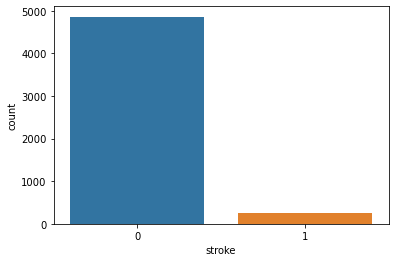

In [48]:
strokes_plot = sns.countplot(x='stroke', data=strokes)


In [49]:
strokes['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

many fewer strokes than non-strokes. maybe downsample non-strokes in follow-up analysis

In [63]:
# check if missing bmi is random

bmi_check = pd.concat([strokes['bmi'], strokes['stroke']], axis=1)

bmi_check.head()

,bmi,stroke
0,36.6,1
1,NaN,1
2,32.5,1
3,34.4,1
4,24.0,1


In [67]:
bmi_check.groupby(bmi_check['bmi'].isnull()).mean()

,bmi,stroke
bmi,,
False,28.893237,0.042575
True,NaN,0.199005


- bmi.isnull() returns False 29% of the time, and of those, there's a 4% stroke rate
- bmi.isnull() returns True 71% of the time, and of those, there's a 20% stroke rate
- Thus, the absence of bmi.isnull may be predictive of a stroke

In [70]:
# create 'has_bmi' feature 

strokes['has_bmi'] = bmi_check['bmi'].where(bmi_check['bmi'].isnull(), 1)
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0


In [73]:
# fill 'has_bmi' NaNs

strokes['has_bmi'].fillna(0, inplace=True)
strokes.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1.0
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1.0
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,1.0
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,0.0
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,1.0


In [75]:
strokes['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [277]:
def plot_cont_features(dataset, features):
    for i in features:
        stroke = list(dataset[dataset['stroke'] == 1][i])
        non_stroke = list(dataset[dataset['stroke'] == 0][i])
        xmin = min(min(stroke), min(non_stroke))
        xmax = max((max(stroke), max(non_stroke), (max(stroke)+1)))
        width = (xmax - xmin) / 40
        sns.histplot(stroke, color='r', kde=False, bins=np.arange(xmin, xmax, width))
        sns.histplot(non_stroke, color='b', kde=False, bins=np.arange(xmin, xmax, width))
        plt.legend(['stroke', 'non-stroke'])
        plt.title('Overlaid histogram for {}'.format(i))
        plt.show()
        

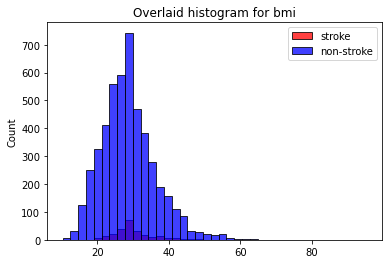

In [278]:
plot_cont_features(strokes, ['bmi'])

Appears that BMI distributions are similar between stroke and non-stroke. therefore normalise bmis to median value


In [85]:
strokes['bmi'].fillna(strokes['bmi'].median(), inplace=True)
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0


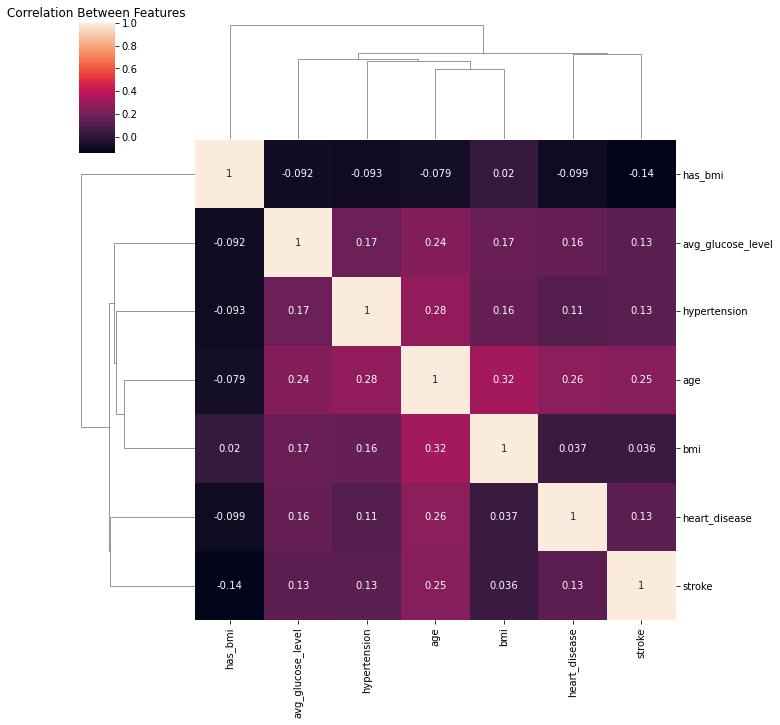

In [86]:
# generate correlation matrix

corr_mat = strokes.corr()

sns.clustermap(corr_mat, annot = True)
plt.title("Correlation Between Features")

plt.show()

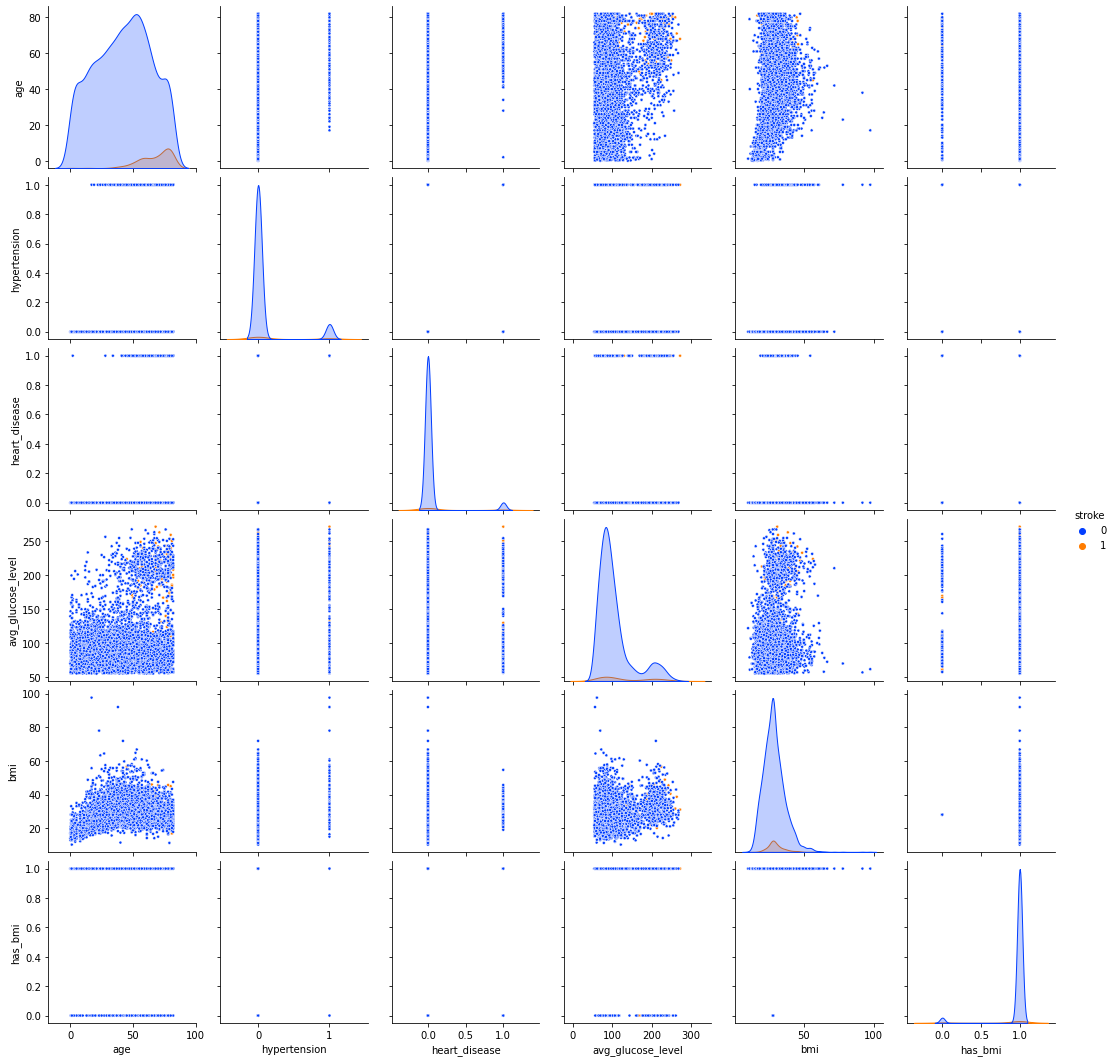

In [95]:
# generate pairplot

# pair plots
threshold = -0.9

 

filt = np.abs(corr_mat["stroke"]) > threshold
corr_feat = corr_mat.columns[filt].tolist()

sns.pairplot(strokes[corr_feat], diag_kind = "kde", markers = '.', hue = "stroke", palette='bright')


plt.show()

Data is very noisy, downsampling is clearly needed

In [171]:
non_strokes = strokes[strokes.stroke != 1]


non_strokes_ds = non_strokes.set_axis(np.arange(0, len(non_strokes.index), axis='index'))

non_strokes_ds.head()


TypeError: list() takes no keyword arguments

In [209]:
# downsample non-stroke data
from time import time


non_strokes = strokes[strokes.stroke != 1]





start = time()
while len(non_strokes.index) > 250:
    is_in_range = False
    while not is_in_range:
        rint = np.random.randint(249, 4860)
        if rint in non_strokes.index:
            is_in_range = True
    non_strokes.drop([rint], inplace=True)
end = time()

total = (end - start)*1000

print(f'total time: {total} ms')
    
print(len(non_strokes.index))







total time: 2102.311849594116 ms
250


In [210]:
non_strokes.head(30)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
4860,Female,1.08,0,0,No,children,Urban,109.33,18.2,Unknown,0,1.0
4861,Female,49.00,0,0,Yes,Private,Urban,206.53,44.5,smokes,0,1.0
4862,Female,53.00,0,0,Yes,Private,Rural,83.91,36.6,Unknown,0,1.0
4863,Female,18.00,0,0,No,Private,Urban,67.92,19.4,never smoked,0,1.0
4864,Female,13.00,0,0,No,children,Rural,73.48,22.9,Unknown,0,1.0
4865,Male,5.00,0,0,No,children,Rural,101.31,20.0,Unknown,0,1.0
4866,Female,37.00,0,0,Yes,Private,Urban,103.66,36.1,smokes,0,1.0
4867,Male,49.00,0,0,Yes,Self-employed,Urban,70.73,27.3,formerly smoked,0,1.0
4868,Female,45.00,0,0,No,Govt_job,Rural,77.45,42.2,formerly smoked,0,1.0
4869,Female,50.00,0,1,Yes,Private,Urban,193.80,26.4,never smoked,0,1.0


In [279]:
strokes_only = strokes[strokes.stroke != 0]

strokes_ds = pd.concat([strokes_only, non_strokes], axis=0)

In [280]:
strokes_ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1.0


In [281]:
# map categorical to numeric

gend = {'Male': 0, 'Female': 1}
married = {'No': 0, 'Yes': 1}
res = {'Urban': 0, 'Rural': 1}
smoke = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}
work = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3}
convert_cols = ['gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type']
convert_list = [gend, married, res, smoke, work]

for i,j in zip(convert_cols, convert_list):
    strokes_ds[i] = strokes_ds[i].map(j)

    
strokes_ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_bmi
0,0,67.0,0,1,1,0,0,228.69,36.6,1,1,1.0
1,1,61.0,0,0,1,1,1,202.21,28.1,0,1,0.0
2,0,80.0,0,1,1,0,1,105.92,32.5,0,1,1.0
3,1,49.0,0,0,1,0,0,171.23,34.4,2,1,1.0
4,1,79.0,1,0,1,1,1,174.12,24.0,0,1,1.0


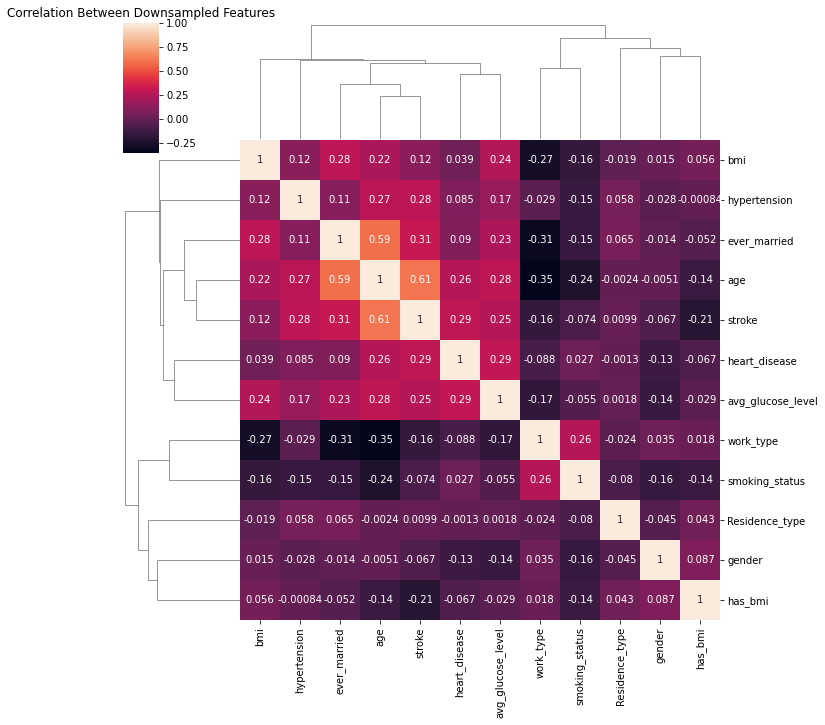

In [282]:
ds_corr_mat = strokes_ds.corr()

sns.clustermap(ds_corr_mat, annot = True)
plt.title("Correlation Between Downsampled Features")

plt.show()

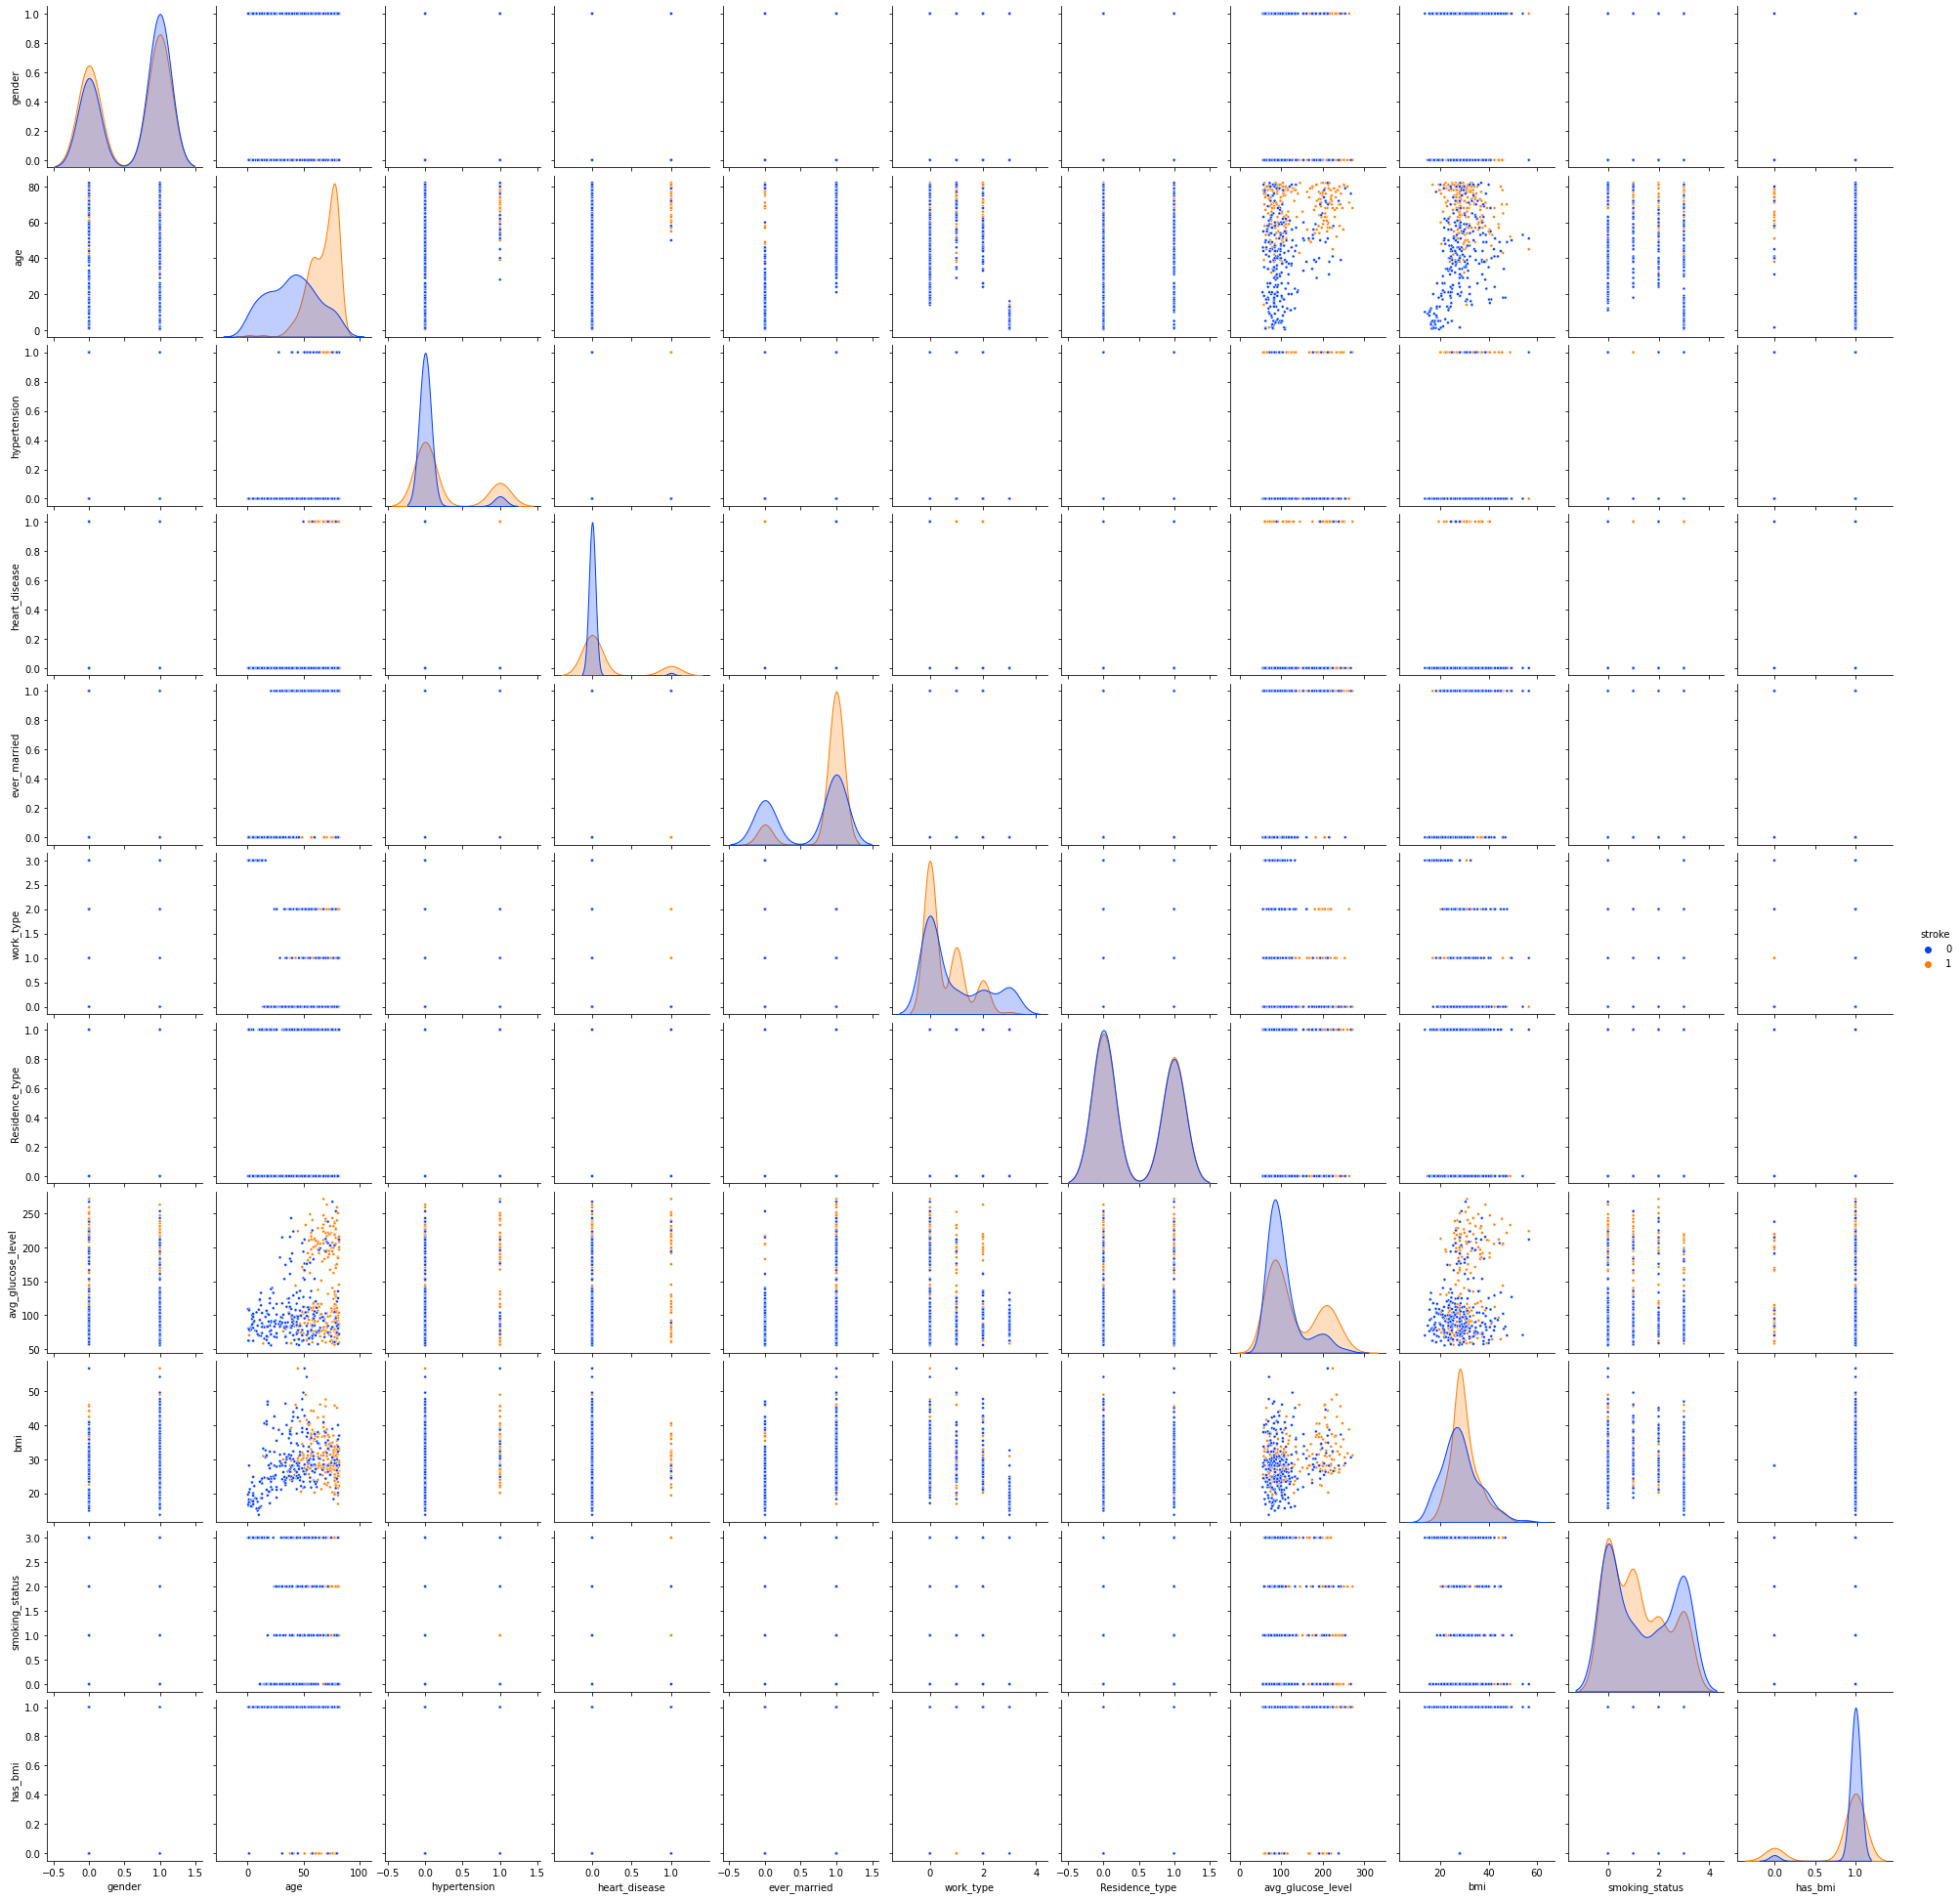

In [283]:
# pairplots
threshold = -0.9

ds_filt = np.abs(ds_corr_mat["stroke"]) > threshold
ds_corr_feat = ds_corr_mat.columns[ds_filt].tolist()

sns.pairplot(strokes_ds[ds_corr_feat], diag_kind = "kde", markers = '.', hue = "stroke", palette='bright')

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'has_bmi']


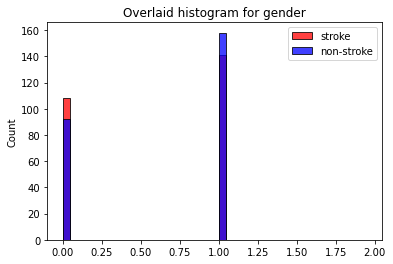

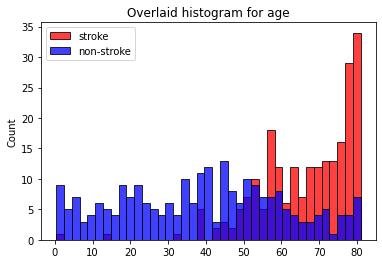

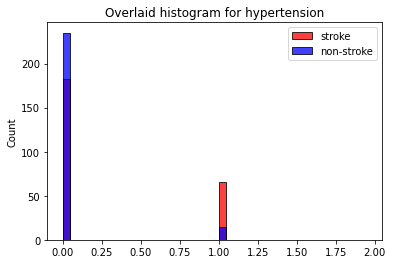

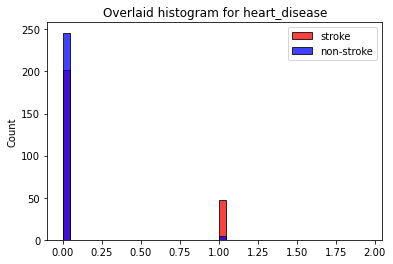

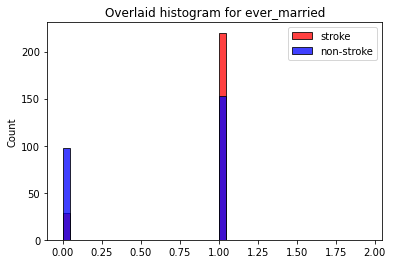

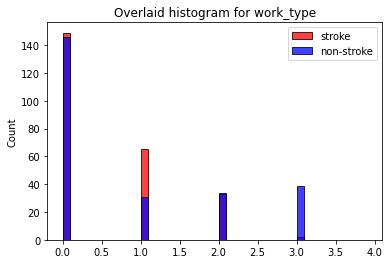

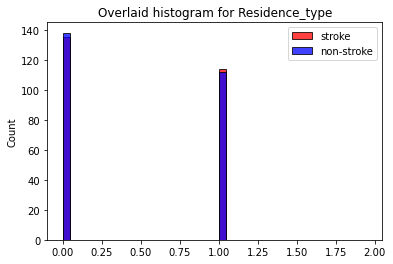

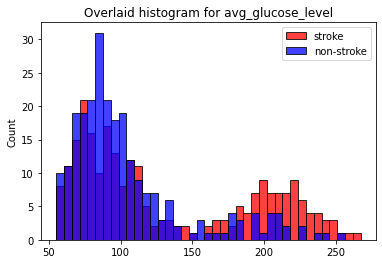

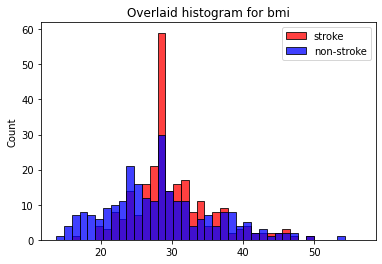

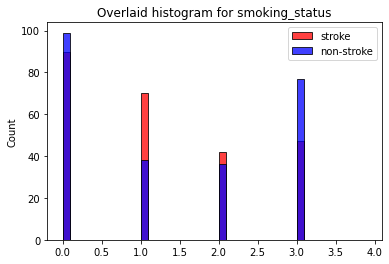

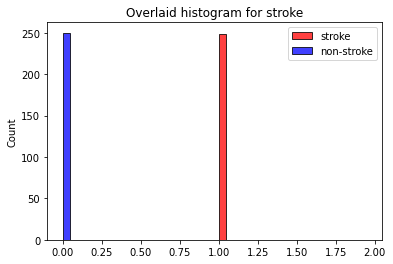

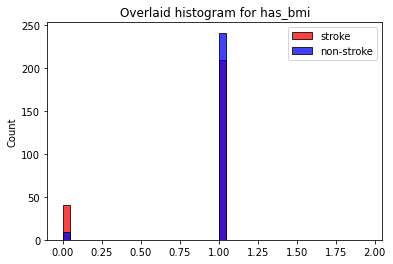

In [284]:
print(list(strokes_ds.columns))

plot_cont_features(strokes_ds, list(strokes_ds.columns))

[85.50586801988061, 13.207314071712068, 1.1972545882563501, 0.03955271687337614, 0.02134757247298717, 0.007150681701453478, 0.006193721154470437, 0.004694595392862528, 0.002033778893678358, 0.0022417115201813754, 0.0032903981029551973, 0.0030581440390096016]


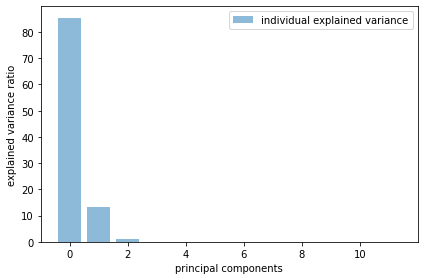

In [285]:
# perform PCA on remaining features

data = strokes_ds
norm_data = data - data.mean()

cov_mat = data.cov()

eig_vals, eig_vects = np.linalg.eig(cov_mat)

e_indices = np.argsort(eig_vals)[::-1]

eig_vects_sorted = eig_vects[:,e_indices]

expl_var = []

for i in eig_vals:
    expl_var.append((i/sum(eig_vals))*100)

print(expl_var)

    
plt.bar(range(len(expl_var)), expl_var, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal components')
plt.legend()
plt.tight_layout()

In [286]:
strokes_ds.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
has_bmi              0
dtype: int64

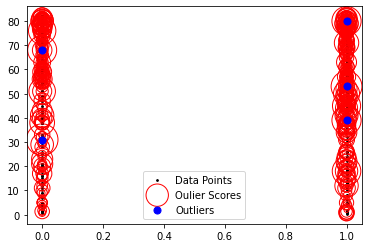

In [287]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor


y = strokes_ds['stroke']
x = strokes_ds.drop(['stroke'], axis = 1)

clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(x)
xScore = clf.negative_outlier_factor_

outlierScore = pd.DataFrame()
outlierScore["score"] = xScore

threshold = -1.5
filt = outlierScore["score"] < threshold
outlierIndex = outlierScore[filt].index.tolist()

radius = (xScore.max() - xScore) / (xScore.max() - xScore.min())
outlierScore["radius"] = radius

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color = 'k', s = 3, label = "Data Points")
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 1000 * radius, edgecolors = 'r', facecolors = "none", label = "Oulier Scores")
plt.scatter(x.iloc[outlierIndex, 0], x.iloc[outlierIndex, 1], color = 'b', s = 50, label = "Outliers")
plt.legend()

plt.show()

In [288]:
def detect_outliers(dataset, feature):
    outliers = []
    data = dataset[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
       

In [289]:
features = strokes_ds.drop('stroke', axis=1)
columns = list(features.columns)

for i in columns:
    detect_outliers(strokes_ds, i)


Outlier caps for gender:
  --95p: 1.0 / 0 values exceed that
  --3sd: 2.1 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for age:
  --95p: 81.0 / 11 values exceed that
  --3sd: 122.3 / 0 values exceed that
  --99p: 82.0 / 0 values exceed that

Outlier caps for hypertension:
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.3 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for heart_disease:
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.0 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for ever_married:
  --95p: 1.0 / 0 values exceed that
  --3sd: 2.1 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for work_type:
  --95p: 3.0 / 0 values exceed that
  --3sd: 3.7 / 0 values exceed that
  --99p: 3.0 / 0 values exceed that

Outlier caps for Residence_type:
  --95p: 1.0 / 0 values exceed that
  --3sd: 1.9 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for avg_glucose_

In [290]:
# normalise data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

min_max = scaler.fit_transform(features)

features_minmax = pd.DataFrame(min_max, columns=features.columns)

features_minmax.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,has_bmi
0,0.0,0.816357,0.0,1.0,1.0,0.000000,0.0,0.801265,0.533800,0.333333,1.0
1,1.0,0.742899,0.0,0.0,1.0,0.333333,1.0,0.679023,0.335664,0.000000,0.0
2,0.0,0.975514,0.0,1.0,1.0,0.000000,1.0,0.234512,0.438228,0.000000,1.0
3,1.0,0.595984,0.0,0.0,1.0,0.000000,0.0,0.536008,0.482517,0.666667,1.0
4,1.0,0.963271,1.0,0.0,1.0,0.333333,1.0,0.549349,0.240093,0.000000,1.0


In [291]:
from sklearn.model_selection import train_test_split

features = features_minmax
labels = pd.DataFrame(strokes_ds, columns=['stroke'])

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.4) # training set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, random_state=42, test_size=0.5) # splits remaining into val and test

In [293]:
# export datasets
strokes_ds.to_csv('./strokes_ds.csv', index=False)


x_train.to_csv('./x_train_features.csv', header=None, index=False)
x_val.to_csv('./x_val_features.csv', header=None, index=False)    
x_test.to_csv('./x_test_features.csv', header=None, index=False)

y_train.to_csv('./y_train_labels.csv', header=None, index=False)
y_val.to_csv('./y_val_labels.csv', header=None, index=False)
y_test.to_csv('./y_test_labels.csv', header=None, index=False)